# Naïve Algorithm

The Naïve Algorithm is a fundamental approach to solving the maximum s-t (source-to-sink) flow problem in network flow analysis. This algorithm provides an elementary method for determining the maximum flow that can be sent from a source node $s$ to a sink node $t$ within a flow network. The process involves initially sending flow along any path from $s$ to $t$ that has available capacity. The key principle behind the Naïve Algorithm is to repeatedly find such paths and push as much flow as possible along them until no further augmenting paths exist.

Here we use example in Figure 3.1: An input for the max s-t flow problem.

<img src="maxFlowQ1.jpeg" alt="" width="400"/>

We could transform this graph to a table as follows:

$$
\begin{matrix}
   & S & A & B & C & D & E & T \\
 S & 0 & 3 & 1 & 1 & 0 & 0 & 0 \\
 A & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
 B & 0 & 1 & 0 & 0 & 0 & 3 & 0 \\
 C & 0 & 0 & 0 & 0 & 4 & 2 & 0 \\
 D & 0 & 0 & 0 & 0 & 0 & 0 & 4 \\
 E & 0 & 0 & 0 & 4 & 0 & 0 & 1 \\
 T & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{matrix}
$$

and hence generate a capacity matrix Q:

$$
Q=\left[
\begin{matrix}
 0 & 3 & 1 & 1 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
 0 & 1 & 0 & 0 & 0 & 3 & 0 \\
 0 & 0 & 0 & 0 & 4 & 2 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 4 \\
 0 & 0 & 0 & 4 & 0 & 0 & 1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{matrix}
\right]
$$

In [1]:
#pip install networkx matplotlib
import numpy as np
from collections import deque
from plotFlow import plot_graph_from_matrix, plot_graph_from_matrix_string, plot_graph_from_matrix_string2

**Step 1:** Find an augmenting path from $s$ to $t$ without considering the weight of each edge.

In [2]:
def bfs_path(graph, start, goal):
    queue = deque([(start, [start])])  # queue of (current node, path to current node)
    visited = set()
    visited.add(start)
    
    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path
        for neighbor in range(len(graph[current])):
            if graph[current][neighbor] != 0 and neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))
    return None  # return None if no path is found

**Step 2:** Calculates the minimum capacity along the path and then updates the residual of the edges.

In [3]:
def update_residual_graph(graph, path):
    min_capacity = float('inf')
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        if graph[start][end] < min_capacity:
            min_capacity = graph[start][end]
    
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        graph[start][end] -= min_capacity
    return min_capacity


**Iteration** Repeat each step until there's no direct connections between node $s$ and $t$

Maximum flow: 4
Updated Residual Graph:
[0 1 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 1 0 0 0 1 0]
[0 0 0 0 2 2 0]
[0 0 0 0 0 0 1]
[0 0 0 3 0 0 0]
[0 0 0 0 0 0 0]


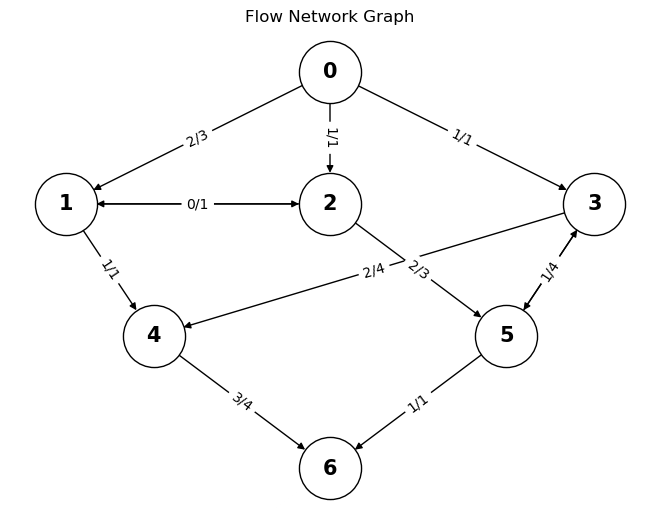

In [4]:
def main():
    # Example input matrix Q
    Q = np.array([
        [0, 3, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 3, 0],
        [0, 0, 0, 0, 4, 2, 0],
        [0, 0, 0, 0, 0, 0, 4],
        [0, 0, 0, 4, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0]
    ])
    
    residual_Q = Q.copy()  # Copy Q to use as the residual graph
    total_flow = 0
    source = 0  # Source node index
    sink = len(Q) - 1  # Sink node index

    while True:
        path = bfs_path(residual_Q, source, sink)
        if path is None:
            break
        flow = update_residual_graph(residual_Q, path)
        total_flow += flow

    print("Maximum flow:", total_flow)
    print("Updated Residual Graph:")
    for row in residual_Q:
        print(row)

    # Compute the occupation matrix and format as fraction
    occupation_matrix = np.zeros_like(Q, dtype=object)
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            if Q[i, j] != 0:
                usage = Q[i, j] - residual_Q[i, j]
                occupation_matrix[i, j] = f"{usage}/{Q[i, j]}"
            else:
                occupation_matrix[i, j] = '0'


    
    plot_graph_from_matrix_string2(occupation_matrix, source, sink)

if __name__ == '__main__':
    main()

Although this algorithm serves as a conceptual tool for understanding the max flow problem, it is generally not efficient for large networks due to its lack of optimization mechanisms, such as those found in more advanced algorithms like the Ford-Fulkerson method or the Edmonds-Karp algorithm. Nonetheless, studying the Naïve Algorithm provides valuable insights into the basic mechanics of flow algorithms and the foundation upon which more sophisticated techniques are built.

The following is an example when the Naïve Algorithm cannot come with the optimal solution. Considering the capacity matrix:

$$
Q=\left[
\begin{matrix}
 0 & 4 & 2 & 0 & 0 & 0 \\
 0 & 0 & 1 & 2 & 4 & 0 \\
 0 & 0 & 0 & 0 & 2 & 0 \\
 0 & 0 & 0 & 0 & 0 & 3 \\
 0 & 0 & 0 & 0 & 0 & 3 \\
 0 & 0 & 0 & 0 & 0 & 0 \\
\end{matrix}
\right]
$$

Maximum flow: 4
Updated Residual Graph:
[0 0 2 0 0 0]
[0 0 1 1 1 0]
[0 0 0 2 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 2]
[0 0 0 0 0 0]


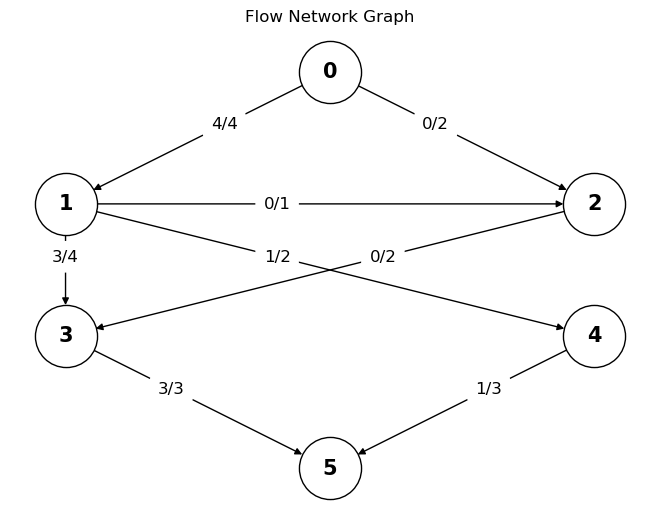

In [5]:
def main():
    # Example input matrix Q
    Q = np.array([[0, 4, 2, 0, 0, 0],
        [0, 0, 1, 4, 2, 0],
        [0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 3],
        [0, 0, 0, 0, 0, 3],
        [0, 0, 0, 0, 0, 0]])
    
    residual_Q = Q.copy()  # Copy Q to use as the residual graph
    total_flow = 0
    source = 0  # Source node index
    sink = len(Q) - 1  # Sink node index

    while True:
        path = bfs_path(residual_Q, source, sink)
        if path is None:
            break
        flow = update_residual_graph(residual_Q, path)
        total_flow += flow

    print("Maximum flow:", total_flow)
    print("Updated Residual Graph:")
    for row in residual_Q:
        print(row)

    # Compute the occupation matrix and format as fraction
    occupation_matrix = np.zeros_like(Q, dtype=object)
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            if Q[i, j] != 0:
                usage = Q[i, j] - residual_Q[i, j]
                occupation_matrix[i, j] = f"{usage}/{Q[i, j]}"
            else:
                occupation_matrix[i, j] = '0'


    
    plot_graph_from_matrix_string(occupation_matrix, source, sink)

if __name__ == '__main__':
    main()

One may notice that there's a better allocation of flow with a maximum capacity of 5 as follows.

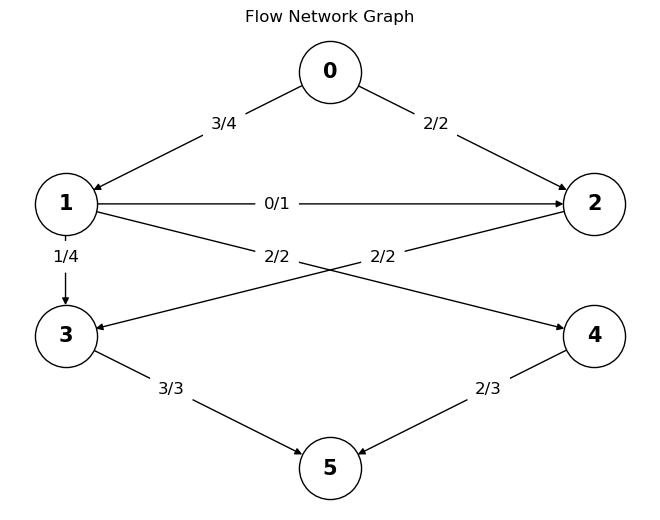

In [7]:
opt_matrix = np.array(
    [['0','3/4','2/2','0','0','0'],
     ['0','0','0/1','1/4','2/2','0'],
     ['0','0','0','2/2','0','0'],
     ['0','0','0','0','0','3/3'],
     ['0','0','0','0','0','2/3'],
     ['0','0','0','0','0','0'],
    ])

plot_graph_from_matrix_string(opt_matrix, 0, 5)

Both of these flows are **Blocking Flows** such that no more flow from source to sink could be found. Notice that all *Maximum Flows* are blocking flows. Notice that Naïve Algorithm will always find a blocking flows but may not find the maximum flow.

The problem can then be naturally set up as an LP by using a variable for the flow along each edge.

$$
\begin{alignat*}{3}
&&\max \sum_{v:(s,v)\in E}f_{(s,v)}&&-\sum_{v:(s,v)\in E}f_{(v,s)} &&\\
&& s.t.&&\forall(u,v)\in E && f_{(u,v)}\geq0 \\
&& &&\forall(u,v)\in E && f_{(u,v)}\leq C_{(u,v)} 
\end{alignat*}
$$

$$
\forall v \neq s,t \quad \sum_{u:(u,v)\in E}f_{(u,v)}=\sum_{w:(v,w)}\in E f_{(v,w)}
$$